<a href="https://colab.research.google.com/github/alitaspaul/DSP-LAB/blob/master/Experiment6_DSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXPERIMENT-6

---



**Inverse Discrete Fourier Transform**

---


DATE: 29/08/2023

---


AIM:

Write a program to find IDFT of any sequence using:

i) mathematical expression

ii) matrix form (twiddle factor)

Plot magnitude and phase response .

---



SOFTWARE USED:

Python


---


THEORY:

IDFT is the inverse of DFT. The finite length sequence can be obtained from the DFT by performing IDFT.

IDFT is given by:

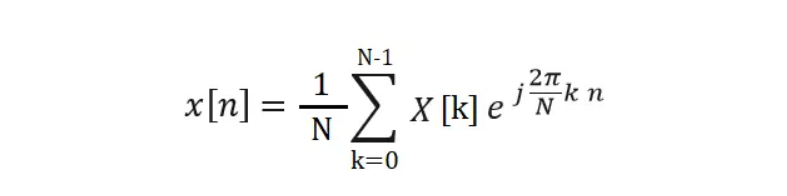

where n = 0,1,2,3,....,N-1.

The Inverse Discrete Fourier Transform maps the signal back from the frequency domain to time domain.


---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

Enter the sequence:1,2,3,4
Enter the value of N to find N-point DFT:8
The N-point IDFT of the input sequence using Mathematical expression:
 [ 1.25     +0.00000000e+00j -0.0517767+9.05330086e-01j
 -0.25     -2.50000000e-01j  0.3017767+1.55330086e-01j
 -0.25     +1.22464680e-16j  0.3017767-1.55330086e-01j
 -0.25     +2.50000000e-01j -0.0517767-9.05330086e-01j]

The N-point IDFT using in-build python function:
 [ 1.25     +0.j         -0.0517767+0.90533009j -0.25     -0.25j
  0.3017767+0.15533009j -0.25     +0.j          0.3017767-0.15533009j
 -0.25     +0.25j       -0.0517767-0.90533009j]

The IDFT of the input sequence using Mathematical expression is:
 [ 2.5+0.0000000e+00j -0.5-5.0000000e-01j -0.5+2.4492936e-16j
 -0.5+5.0000000e-01j]

The IDFT using in-build python function:
 [ 2.5+0.j  -0.5-0.5j -0.5+0.j  -0.5+0.5j]


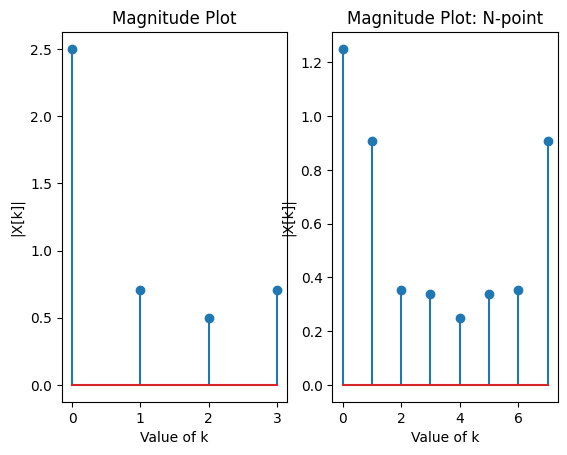

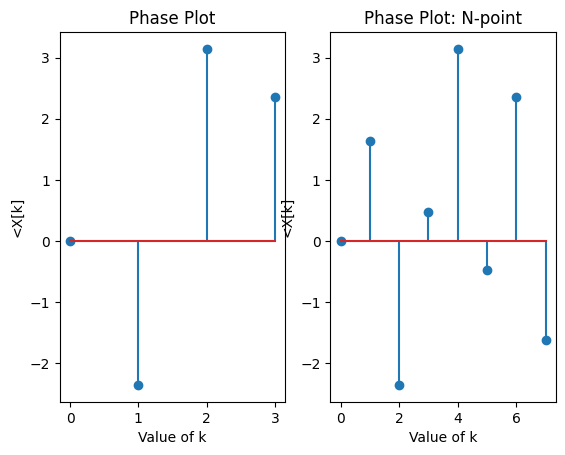

In [7]:
#using mathematical equation:- N-point DFT:
x = np.array(input("Enter the sequence:").split(",")).astype(int)
N = int(input("Enter the value of N to find N-point DFT:"))
xn = x #x without zero padding
kn = len(xn)  #size of xn
kn_array = np.arange(0,kn,1)



if len(x)!= N:
  x = np.pad(x,(0,N-len(x)))  # pad zeroes at the end in case to make size of the two arrays equal
                              # (0,k) => 0 zeroes at the left, k no of zeroes at the right
k = len(x)  #size of new zero padded array
k_array = np.arange(0,k,1) #x-axis for magnitude plot

def idft(x,k):

  #output array
  y = np.zeros(k,dtype = 'complex') #because we need a complex matrix as output
  for i in range (k):
    sum = 0
    for m in range (k):
      sum += x[m]*np.exp(complex(1j)*2*np.pi*i*m*float(1/k))
    y[i] = sum*(1/k)
  return y

y = idft(x,k) #idft with zero padding
yn = idft(xn,kn) #idft without zero padding

print("The N-point IDFT of the input sequence using Mathematical expression:\n",y)
print()
print("The N-point IDFT using in-build python function:\n",np.fft.ifft(x)) #py function to find idft : np.fft.ifft
print()
print("The IDFT of the input sequence using Mathematical expression is:\n",yn)
print()
print("The IDFT using in-build python function:\n",np.fft.ifft(xn))


#magnitude plot
#normal IDFT
mag_yn = [abs(i) for i in yn]
plt.subplot(1,2,1)
plt.stem(kn_array,mag_yn)
plt.title("Magnitude Plot")
plt.xlabel("Value of k")
plt.ylabel("|X[k]|")

#N-point IDFT
mag_y = [abs(i) for i in y]
plt.subplot(1,2,2)
plt.stem(k_array,mag_y)
plt.title("Magnitude Plot: N-point")
plt.xlabel("Value of k")
plt.ylabel("|X[k]|")
plt.show()

#Phase Plot
#normal IDFT
phase_yn = [cmath.phase(i) for i in yn]
plt.subplot(1,2,1)
plt.stem(kn_array,phase_yn)
plt.title("Phase Plot")
plt.xlabel("Value of k")
plt.ylabel("<X[k]")

#N-point IDFT
phase_y = [cmath.phase(i) for i in y]
plt.subplot(1,2,2)
plt.stem(k_array,phase_y)
plt.title("Phase Plot: N-point")
plt.xlabel("Value of k")
plt.ylabel("<X[k]")
plt.show()


Enter the sequence:1,2,3,4
[[ 1.0000000e+00+0.0000000e+00j  1.0000000e+00+0.0000000e+00j
   1.0000000e+00+0.0000000e+00j  1.0000000e+00+0.0000000e+00j]
 [ 1.0000000e+00+0.0000000e+00j  6.1232340e-17-1.0000000e+00j
  -1.0000000e+00-1.2246468e-16j -1.8369702e-16+1.0000000e+00j]
 [ 1.0000000e+00+0.0000000e+00j -1.0000000e+00-1.2246468e-16j
   1.0000000e+00+2.4492936e-16j -1.0000000e+00-3.6739404e-16j]
 [ 1.0000000e+00+0.0000000e+00j -1.8369702e-16+1.0000000e+00j
  -1.0000000e+00-3.6739404e-16j  5.5109106e-16-1.0000000e+00j]]
The DFT of the input sequence using twiddle matrix is:
 [ 2.5+0.0000000e+00j -0.5+5.0000000e-01j -0.5-2.4492936e-16j
 -0.5-5.0000000e-01j]


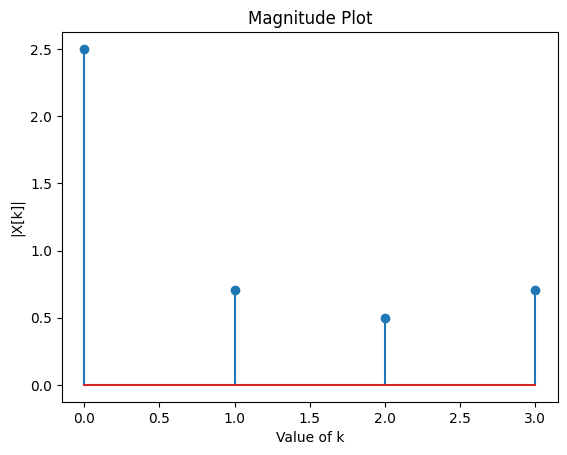

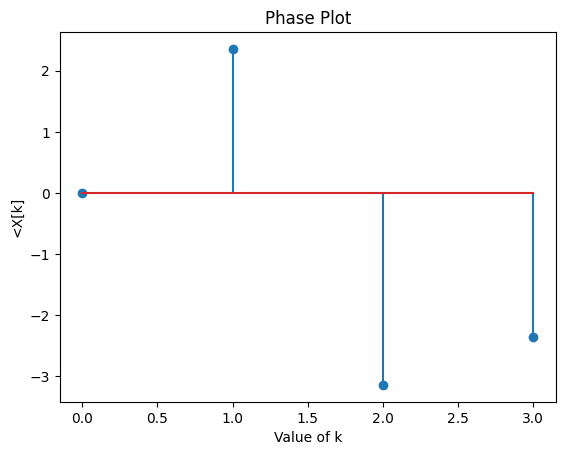

In [6]:
#using twiddle matrix
x = np.array(input("Enter the sequence:").split(",")).astype(int)

k = len(x)
k_array = np.arange(0,k,1)

#twiddle matrix
twiddle = np.ones(k, dtype = "complex")

for i in range (1,k):
  for j in range (k):
    num = np.exp(complex(-1j)*2*np.pi*i*j*float(1/k))
    twiddle = np.append(twiddle,num)

twiddle.shape = (k,k)
print(twiddle)

#output sequence
y = (np.dot(twiddle,x))*(1/k)
print("The IDFT of the input sequence using twiddle matrix is:\n", y)


#magnitude plot
mag_y = [abs(k) for k in y ]
plt.stem(k_array,mag_y)
plt.title("Magnitude Plot")
plt.xlabel("Value of k")
plt.ylabel("|X[k]|")
plt.show()

#Phase Plot
phase_y = [cmath.phase(k) for k in y]
plt.stem(k_array,phase_y)
plt.title("Phase Plot")
plt.xlabel("Value of k")
plt.ylabel("<X[k]")
plt.show()



